In [8]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import nltk
from nltk.corpus import words

from sklearn.feature_extraction.text import CountVectorizer

# Read data
df = pd.read_csv('data/mental_health.csv')

# Print a few data points
print(df.head())

print("\nShape of the DataFrame:", df.shape)

                                                text  label
0  dear american teens question dutch person hear...      0
1  nothing look forward lifei dont many reasons k...      1
2  music recommendations im looking expand playli...      0
3  im done trying feel betterthe reason im still ...      1
4  worried  year old girl subject domestic physic...      1

Shape of the DataFrame: (27977, 2)


In [9]:
# Get the distribution of the label column
label_counts = df['label'].value_counts().sort_values(ascending=False)

# Print the label distribution in a clear table format
print("Distribution of the 'label' column:")
print(label_counts.to_string())

Distribution of the 'label' column:
label
0    14139
1    13838


In [10]:
# We disregard blank / white space only data points, are there any?
blank_rows = df[df['text'].str.strip() == '']

# Print out the exact row index of the blank rows
print("Indices of blank rows:", blank_rows.index.tolist())

Indices of blank rows: [6579, 13183]


In [11]:
# Remove the blank rows from the DataFrame
df = df[df['text'].str.strip() != '']

# Print the shape of the DataFrame after removing blank rows
print("Shape of the DataFrame after removing blank rows:", df.shape)

Shape of the DataFrame after removing blank rows: (27975, 2)


In [31]:
# Let's see n-data points with highest / lowest number of words
n_with_highest_lowest_word_count = 10

# Calculate the number of words in each text entry
df['word_count'] = df['text'].str.split().str.len()

# Get the ten data points with the highest number of words
highest_points = df.nlargest(n_with_highest_lowest_word_count, 'word_count')

# Get the ten data points with the lowest number of words
lowest_points = df.nsmallest(n_with_highest_lowest_word_count, 'word_count')

# Print the results
print("Data points with the highest number of words:")
print(highest_points[['text', 'word_count', 'label']])

print("\nData points with the lowest number of words:")
print(lowest_points[['text', 'word_count', 'label']])

Data points with the highest number of words:
                                                    text  word_count  label
26111  slipping cracks testimony subhuman early twent...        2676      1
18531  know post here think step outside world thing ...        2670      1
2659   lost friendnote posted tifu subreddit found wo...        2081      1
1654   failed would like read hell kill myselflets st...        2024      1
5389   suicidal heres personal story im even world th...        1796      1
23425  even possible fix always broken fell apartplea...        1470      1
930    match  tag team table match bubba ray spike du...        1462      0
8975   im sociopath kill continue hurt people destroy...        1425      1
23130  really know anymore manok really got get out k...        1424      1
1786   want help want dieredflag like natural selecto...        1404      1

Data points with the lowest number of words:
                                                   text  word_count  lab

In [32]:
# Let's see the number of unique words !: This cell took about 4 minutes to run

# Calculate word frequencies
word_list = df['text'].str.split().sum()  # Create a list of all words
word_counts = Counter(word_list)  # Count the frequency of each word

# Number of unique words
num_unique_words = len(word_counts)
print("Number of unique words:", num_unique_words)

Number of unique words: 72649


In [81]:
# Total number of words in the corpus
total_words = sum(word_counts.values())

# Ratio of unique words to total words
unique_to_total_ratio = num_unique_words / total_words

# Print the results
print(f"Total number of words: {total_words}")
print(f"Unique to total word ratio: {unique_to_total_ratio:.4f}")

Total number of words: 2007613
Unique to total word ratio: 0.0362


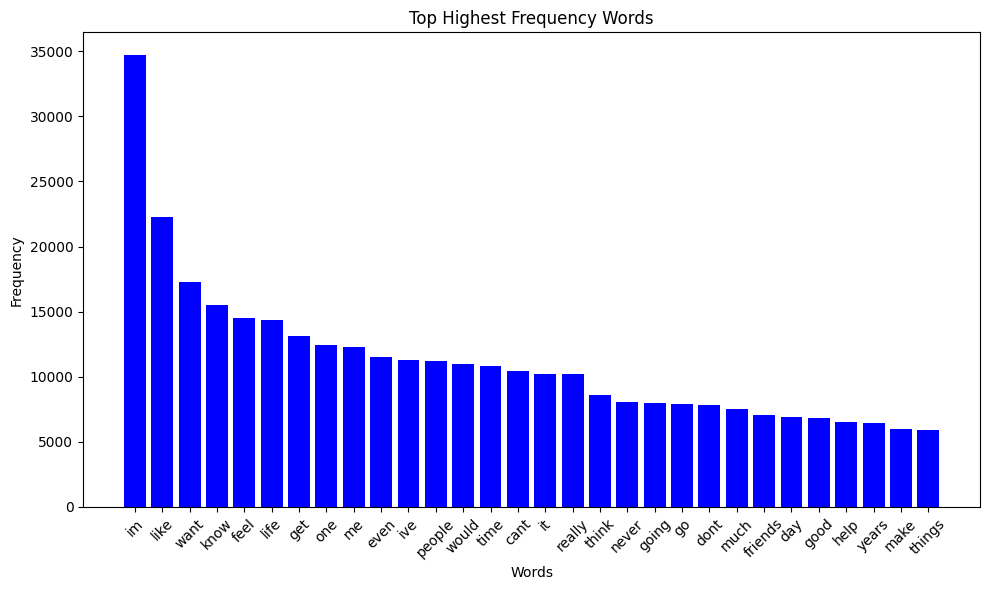


Lowest Frequency Words:
'bridei': 1
'diferently': 1
'hellhounds': 1
'freshmensophomores': 1
'learningdisabled': 1
'neurotypicalnon': 1
'penalizing': 1
'shittalking': 1
'racisttransphobic': 1
'bowing': 1
'humbly': 1
'howwhenwhere': 1
'absolving': 1
'prototypically': 1
'upupfront': 1
'bleachi': 1
'ammoniaalcohol': 1
'sendoff': 1
'tomatoesbr': 1
'cocreator': 1
'visser': 1
'skewering': 1
'sportscaster': 1
'lundquist': 1
'astins': 1
'zuckers': 1
'trampling': 1
'romps': 1
'nicesometimes': 1
'againevery': 1


In [40]:
# The n-words with the highest / lowest frequency

# Prepare data for plotting
n_highest_lowest_freq = 30
highest_freq_words = word_counts.most_common(n_highest_lowest_freq)
lowest_freq_words = word_counts.most_common()[:-n_highest_lowest_freq-1:-1]  # Get the lowest frequencies

# Unzip the word counts for plotting
highest_words, highest_counts = zip(*highest_freq_words)

# Plot highest frequency words
plt.figure(figsize=(10, 6))
plt.bar(highest_words, highest_counts, color='blue')
plt.title('Top Highest Frequency Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

# Print lowest frequency words
print("\nLowest Frequency Words:")
for word, count in lowest_freq_words:
    print(f"'{word}': {count}")

In [41]:
# Let's see the number of text with 10 words or less

# Count the number of data points with word count under 10
count_under_10 = df[df['word_count'] < 10].shape[0]

# Print the result
print("Number of data points with word count under 10:", count_under_10)

Number of data points with word count under 10: 3273


In [5]:
# Download the words corpus (run this once)
# nltk.download('words')

# Create a set of known words
known_words = set(words.words())

# Function to identify suspected incorrect words
def find_incorrect_words(text_series):
    suspected_incorrect = set()
    for text in text_series:
        # Split text into words
        word_list = text.split()
        # Check each word against the known words
        for word in word_list:
            # Normalize the word (lowercase) and check for correctness
            if word.lower() not in known_words:
                suspected_incorrect.add(word)
    return list(suspected_incorrect)

# Get suspected incorrect words from the DataFrame
suspected_incorrect_words = find_incorrect_words(df['text'])

n_suspects_incorrect = 10

# Print n-suspected incorrect words
print(n_suspects_incorrect, "Suspected Incorrect Words:", suspected_incorrect_words[:n_suspects_incorrect])

10 Suspected Incorrect Words: ['oftdone', 'ehbr', 'fatherwith', 'invoking', 'keisha', 'coughfinok', 'soundtackesque', 'muzaffar', 'kvindet', 'musiclipsyncing']


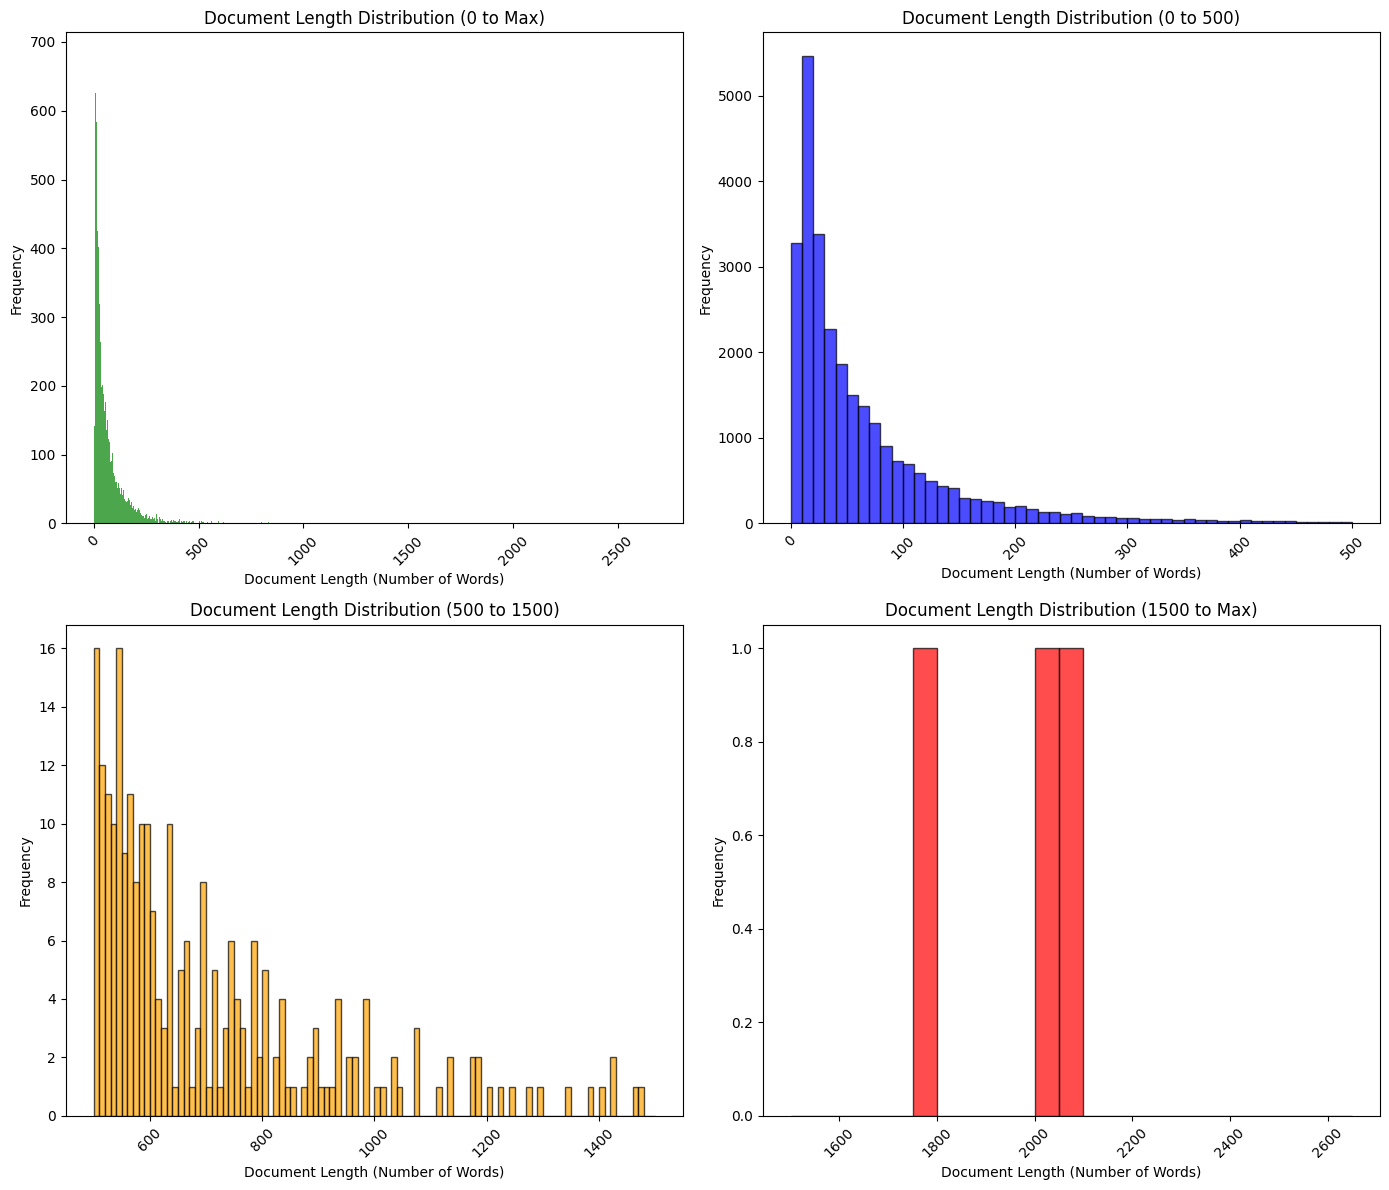

Average Document Length (word count): 71.75940951495872
Minimum Document Length (word count): 0
Maximum Document Length (word count): 2676


In [6]:
# Document length distribution

# Calculate the document length (number of words) for each comment
df['document_length'] = df['text'].str.split().str.len()

# Create a figure with four subplots
plt.figure(figsize=(14, 12))

# First row: Distribution from 0 to max and 0 to 500
plt.subplot(2, 2, 1)
plt.hist(df['document_length'], bins=range(0, df['document_length'].max() + 2), 
         alpha=0.7, color='green')
plt.title('Document Length Distribution (0 to Max)')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.hist(df['document_length'][df['document_length'] <= 500], bins=range(0, 502, 10), 
         alpha=0.7, color='blue', edgecolor='black')
plt.title('Document Length Distribution (0 to 500)')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Second row: Distribution from 500 to 1500 and 1500 to max
plt.subplot(2, 2, 3)
plt.hist(df['document_length'][(df['document_length'] > 500) & (df['document_length'] <= 1500)],
         bins=range(500, 1502, 10), alpha=0.7, color='orange', edgecolor='black')
plt.title('Document Length Distribution (500 to 1500)')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.hist(df['document_length'][df['document_length'] > 1500],
         bins=range(1500, df['document_length'].max() + 2, 50), alpha=0.7, color='red', edgecolor='black')
plt.title('Document Length Distribution (1500 to Max)')
plt.xlabel('Document Length (Number of Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

# Print statistics
print("Average Document Length (word count):", df['document_length'].mean())
print("Minimum Document Length (word count):", df['document_length'].min())
print("Maximum Document Length (word count):", df['document_length'].max())

In [74]:
# n-grams analysis for corpus count

# Set the number of top n-grams to display
k = 10

# Function to get top n-grams
def get_top_ngrams(corpus, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(corpus)
    ngrams_sum = ngrams.sum(axis=0)
    ngram_freq = [(word, ngrams_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return ngram_freq[:top_k]

# Get top 10 bigrams
top_bigrams = get_top_ngrams(df['text'], n=2, top_k=k)

# print("Top 10 Bigrams:")
# for bigram, freq in top_bigrams:
#     print(f"{bigram}: {freq}")

# Get top 10 trigrams
top_trigrams = get_top_ngrams(df['text'], n=3, top_k=k)

top_tetragrams = get_top_ngrams(df['text'], n=4, top_k=k)

top_pentagrams = get_top_ngrams(df['text'], n=5, top_k=k)

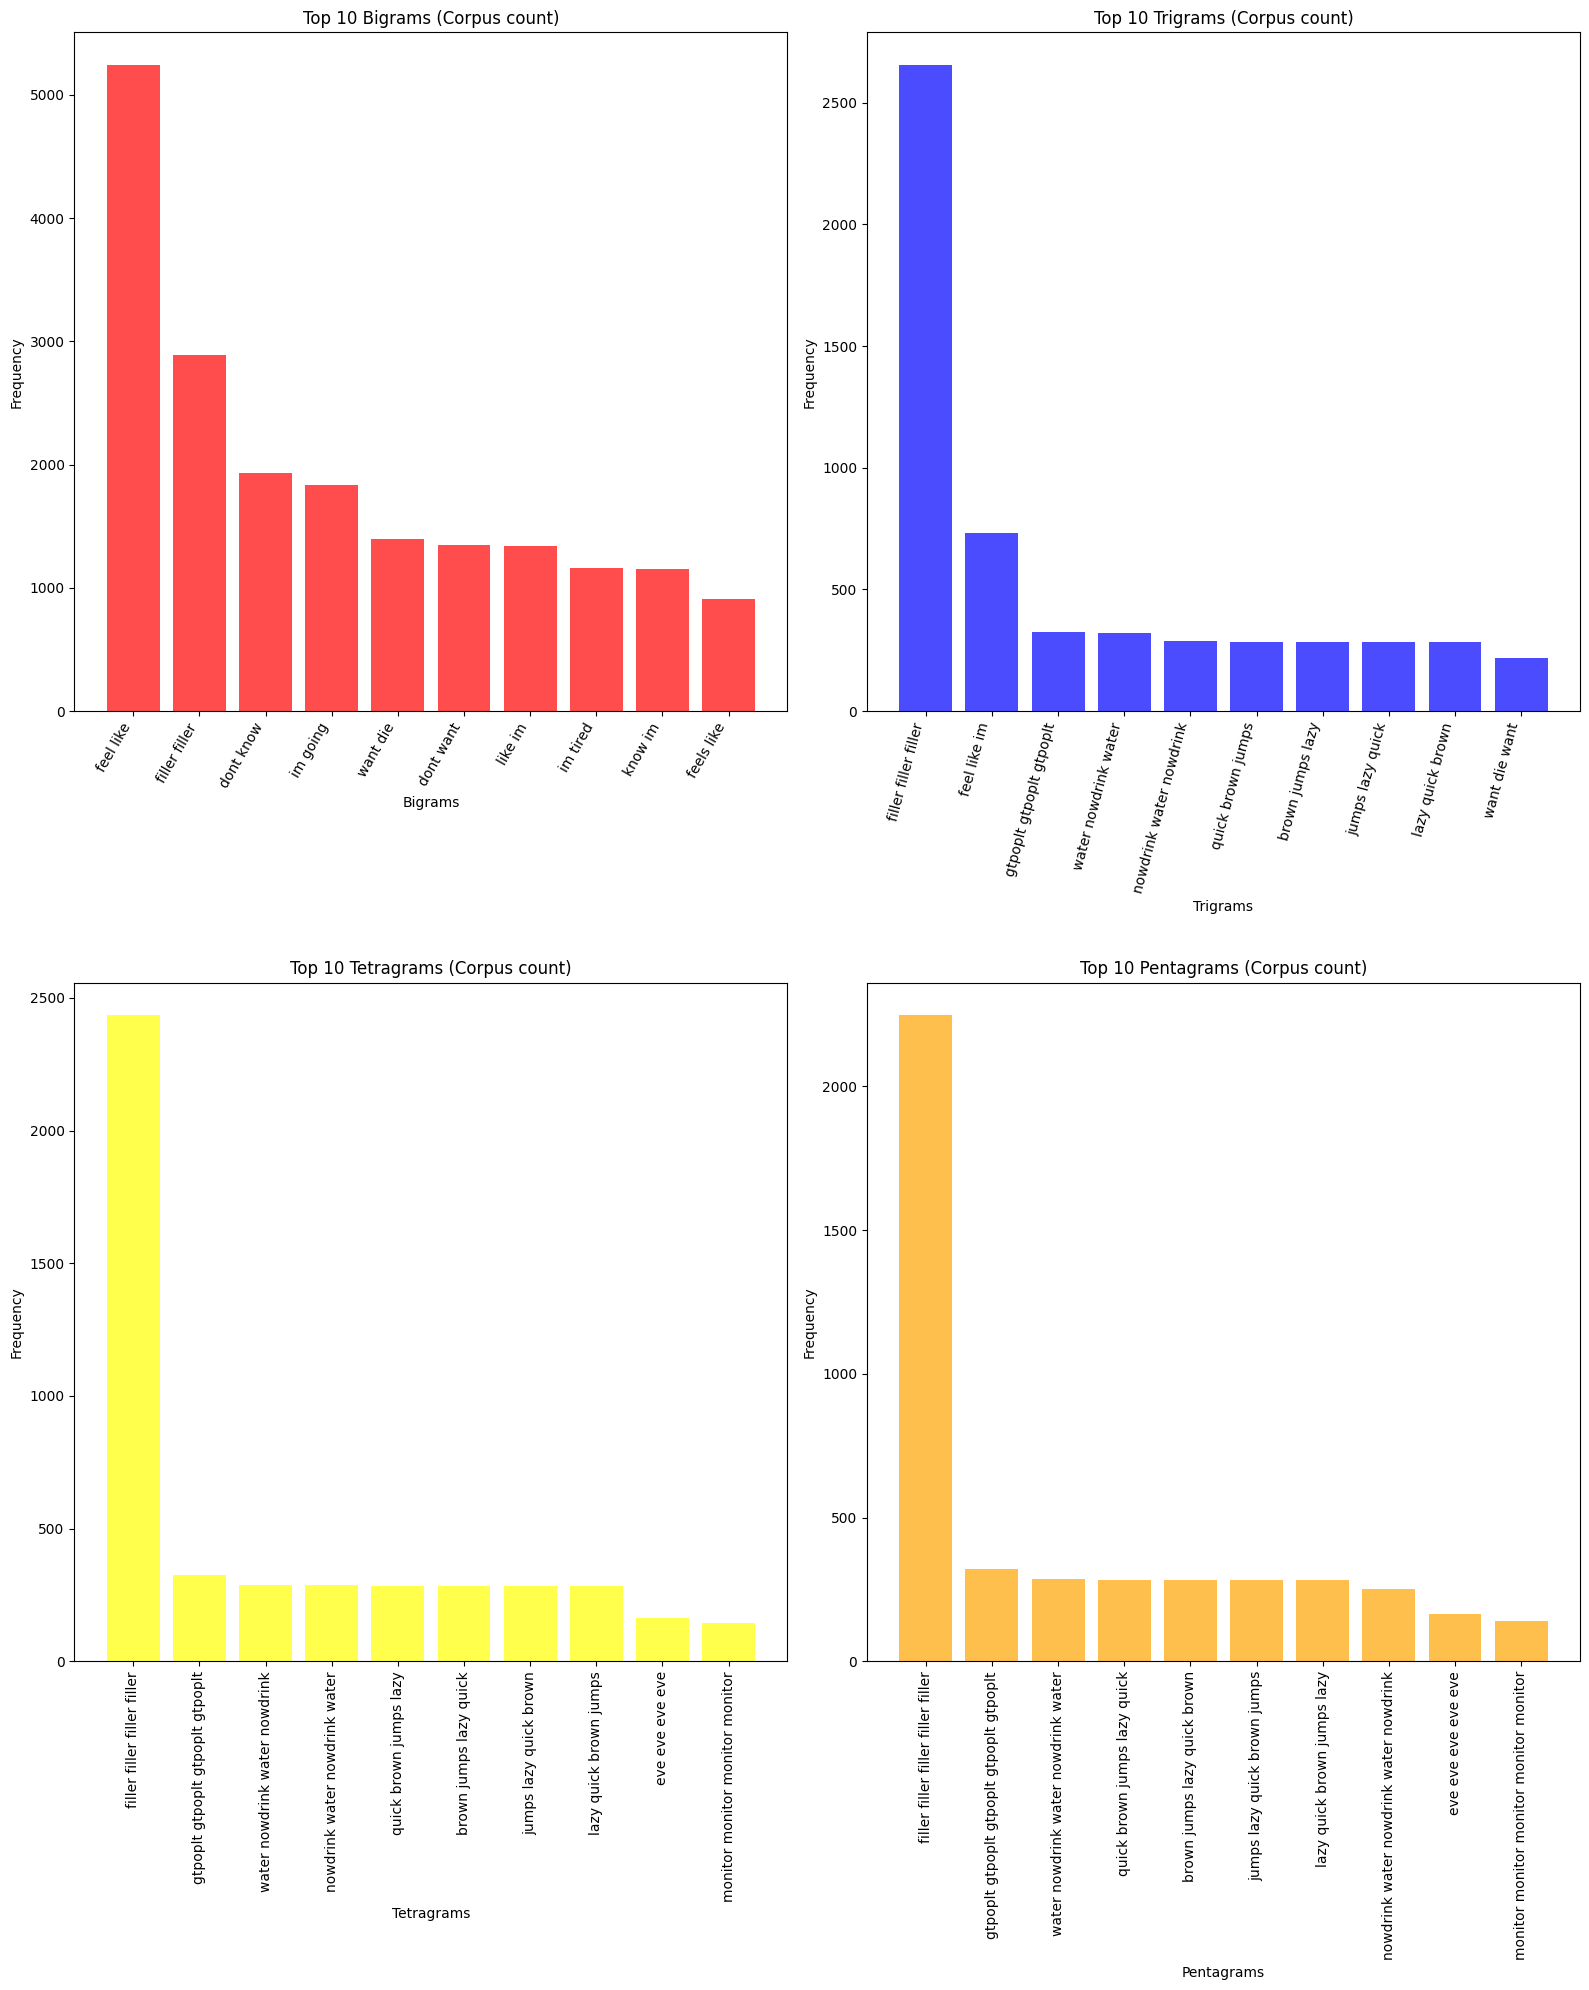

In [83]:
# Separate the words and frequencies for plotting
bigram_labels, bigram_freqs = zip(*top_bigrams)
trigram_labels, trigram_freqs = zip(*top_trigrams)
tetragram_labels, tetragram_freqs = zip(*top_tetragrams)
pentagram_labels, pentagram_freqs = zip(*top_pentagrams)

# Create a figure with four subplots
plt.figure(figsize=(16, 20))  # Increased figure size for better fit

# Bigrams
plt.subplot(2, 2, 1)
plt.bar(bigram_labels, bigram_freqs, color='red', alpha=0.7)
plt.title('Top 10 Bigrams (Corpus count)')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=60, ha='right')

# Trigrams
plt.subplot(2, 2, 2)
plt.bar(trigram_labels, trigram_freqs, color='blue', alpha=0.7)
plt.title('Top 10 Trigrams (Corpus count)')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=75, ha='right')

# Tetragrams
plt.subplot(2, 2, 3)
plt.bar(tetragram_labels, tetragram_freqs, color='yellow', alpha=0.7)
plt.title('Top 10 Tetragrams (Corpus count)')
plt.xlabel('Tetragrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='center')

# Pentagrams
plt.subplot(2, 2, 4)
plt.bar(pentagram_labels, pentagram_freqs, color='orange', alpha=0.7)
plt.title('Top 10 Pentagrams (Corpus count)')
plt.xlabel('Pentagrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust space between rows
plt.show()

In [79]:
# n-grams analysis for document count

# Set the number of top n-grams to display
k = 10

# Function to get top n-grams by document count
def get_top_ngram_doc_count(corpus, n=2, top_k=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english', binary=True)
    ngrams = vectorizer.fit_transform(corpus)
    ngram_doc_count = ngrams.sum(axis=0)
    ngram_freq = [(word, ngram_doc_count[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
    return ngram_freq[:top_k]

# Get top 10 bigrams by document count
top_bigrams_doc_count = get_top_ngram_doc_count(df['text'], n=2, top_k=k)

# Get top 10 trigrams by document count
top_trigrams_doc_count = get_top_ngram_doc_count(df['text'], n=3, top_k=k)

# Get top 10 tetragrams by document count
top_tetragrams_doc_count = get_top_ngram_doc_count(df['text'], n=4, top_k=k)

# Get top 10 pentagrams by document count
top_pentagrams_doc_count = get_top_ngram_doc_count(df['text'], n=5, top_k=k)

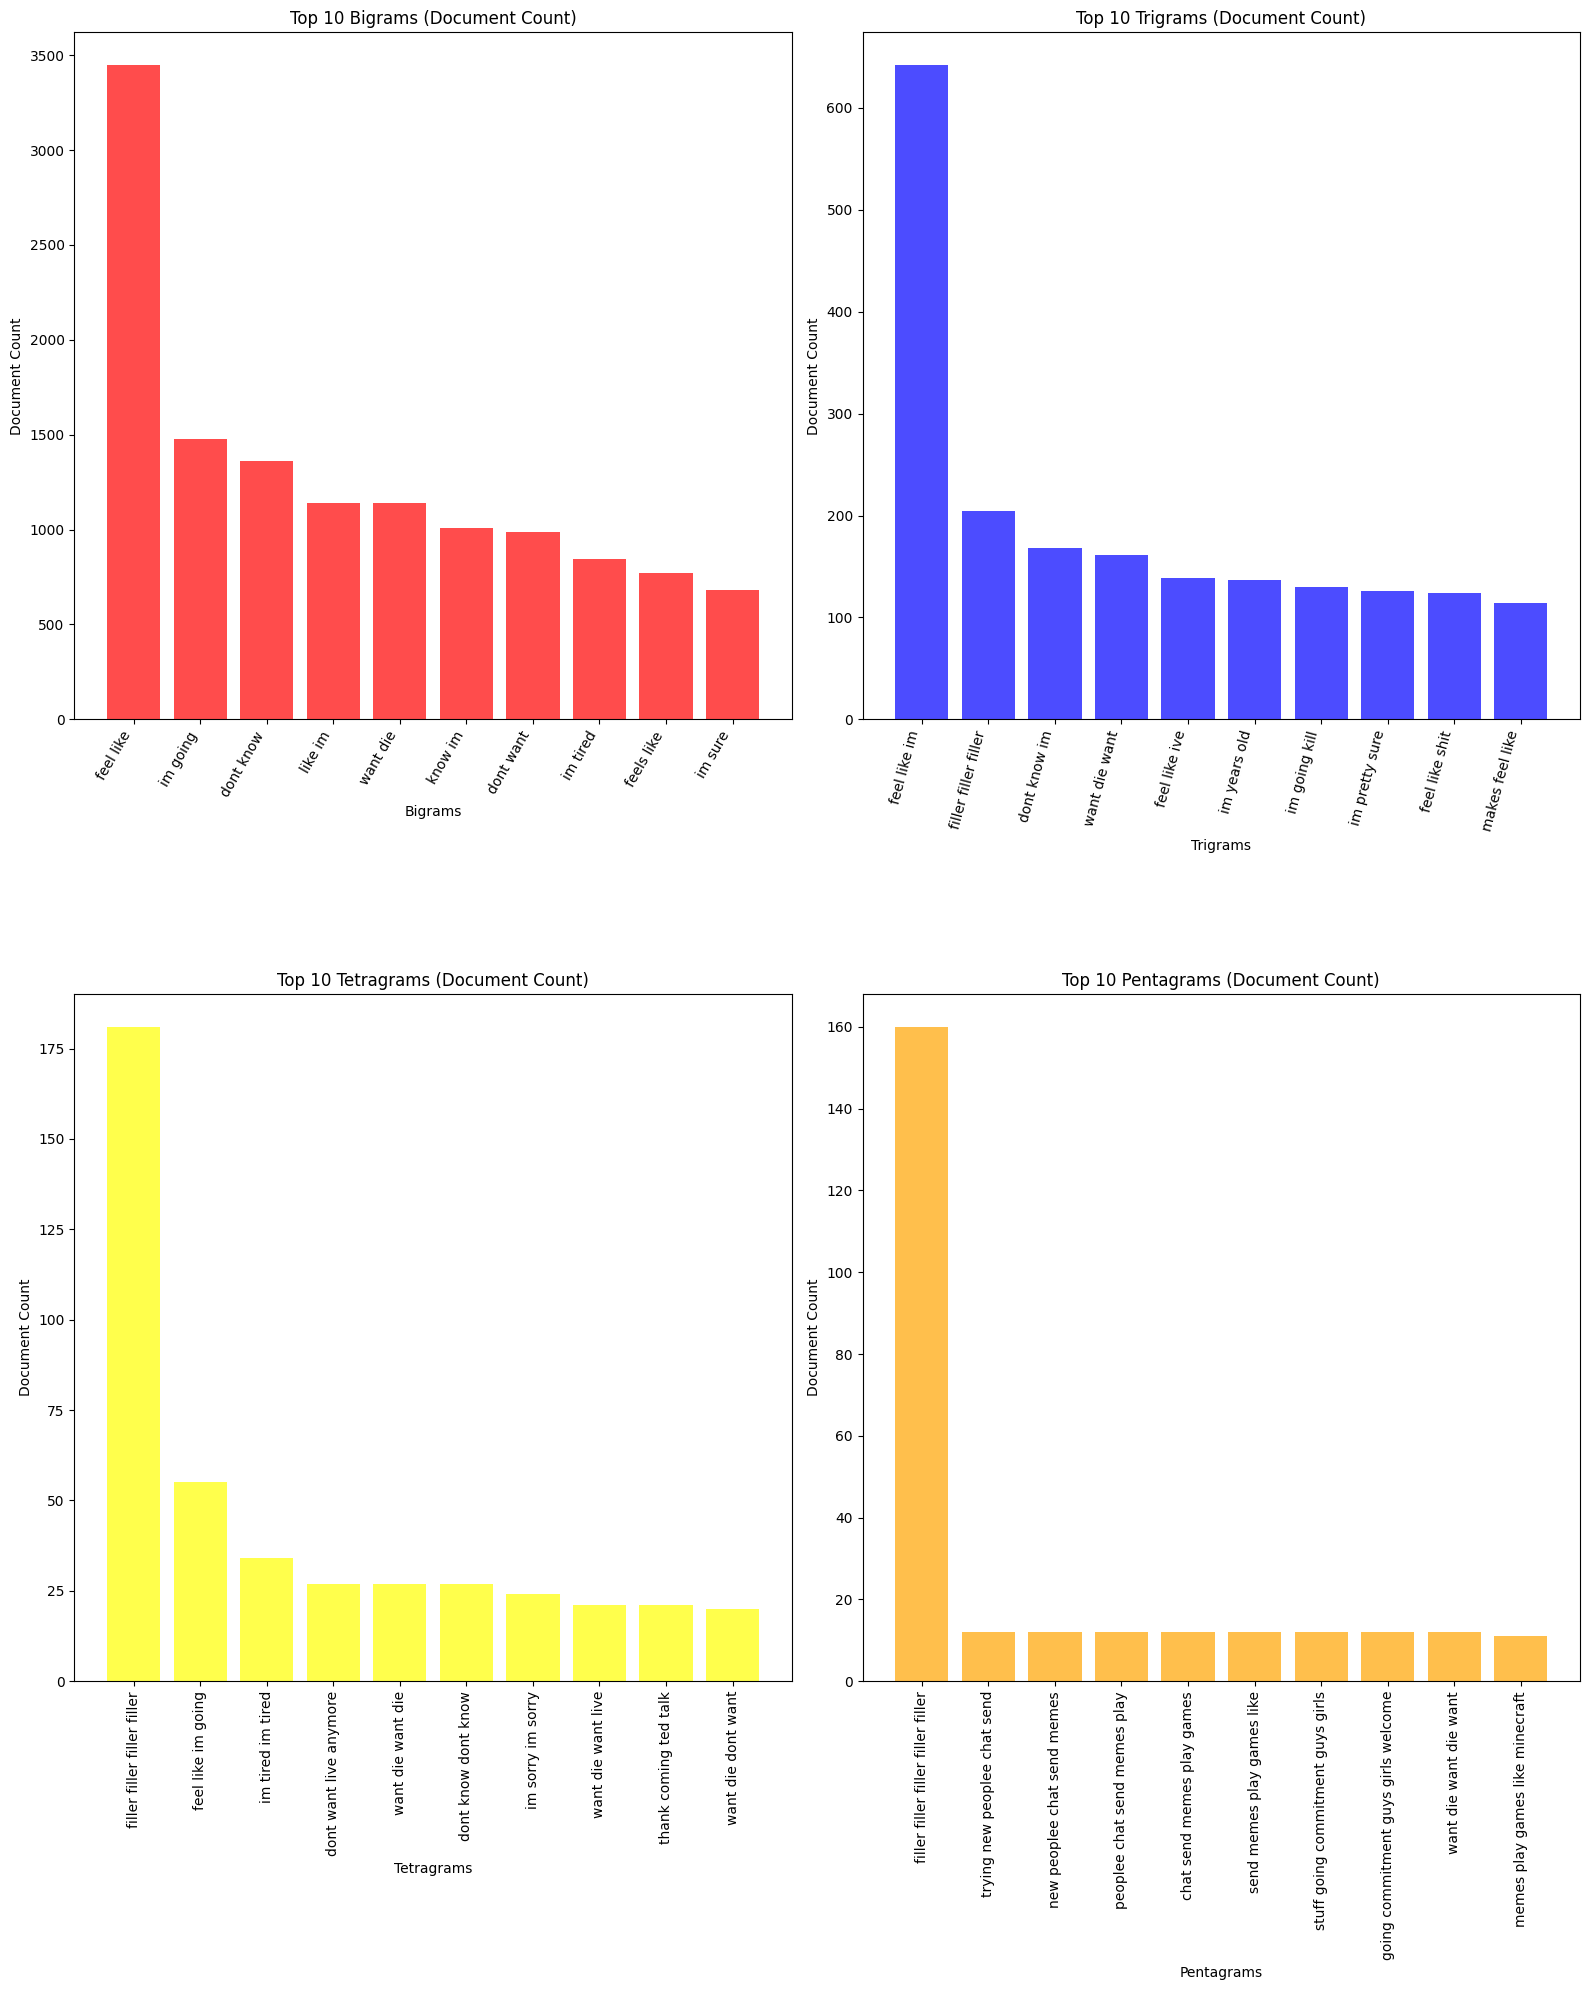

In [80]:
# Separate the words and document counts for plotting
bigram_labels_doc, bigram_doc_counts = zip(*top_bigrams_doc_count)
trigram_labels_doc, trigram_doc_counts = zip(*top_trigrams_doc_count)
tetragram_labels_doc, tetragram_doc_counts = zip(*top_tetragrams_doc_count)
pentagram_labels_doc, pentagram_doc_counts = zip(*top_pentagrams_doc_count)

# Create a figure with four subplots
plt.figure(figsize=(16, 20))  # Increased figure size for better fit

# Bigrams Document Count
plt.subplot(2, 2, 1)
plt.bar(bigram_labels_doc, bigram_doc_counts, color='red', alpha=0.7)
plt.title('Top 10 Bigrams (Document Count)')
plt.xlabel('Bigrams')
plt.ylabel('Document Count')
plt.xticks(rotation=60, ha='right')

# Trigrams Document Count
plt.subplot(2, 2, 2)
plt.bar(trigram_labels_doc, trigram_doc_counts, color='blue', alpha=0.7)
plt.title('Top 10 Trigrams (Document Count)')
plt.xlabel('Trigrams')
plt.ylabel('Document Count')
plt.xticks(rotation=75, ha='right')

# Tetragrams Document Count
plt.subplot(2, 2, 3)
plt.bar(tetragram_labels_doc, tetragram_doc_counts, color='yellow', alpha=0.7)
plt.title('Top 10 Tetragrams (Document Count)')
plt.xlabel('Tetragrams')
plt.ylabel('Document Count')
plt.xticks(rotation=90, ha='center')

# Pentagrams Document Count
plt.subplot(2, 2, 4)
plt.bar(pentagram_labels_doc, pentagram_doc_counts, color='orange', alpha=0.7)
plt.title('Top 10 Pentagrams (Document Count)')
plt.xlabel('Pentagrams')
plt.ylabel('Document Count')
plt.xticks(rotation=90, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust space between rows
plt.show()